### 가위바위보를 하는 프로그램을 만듭니다.
- 가위바위보는 여러 번 진행할 수 있으며, 커맨드에 따라 다양한 동작을 합니다.
- 단, 가위바위보를 진행할 시 결과는 기록되어야 하며 단순하게 승리, 무승부, 패배 횟수만
기록하면 됩니다.
- 재 실행 시, 기록한 데이터를 불러옵니다.
- 사용자의 커맨드에 따라 다양한 역할도 수행해야합니다.
    - “승률”을 입력하면 지금까지의 승률을 보여줍니다. (XX.X%)
    - “그래프”를 입력하면 승률을 그래프로 보여줍니다.
    - “종료”를 입력하면, 프로그램을 종료합니다.
- 가위바위보는 입력은 자유롭게 받아, 정해진 규칙에 따라 진행되기만 하면 됩니다.

Player: 보, Computer: 가위, 플레이어 패배
Player: 바위, Computer: 보, 플레이어 패배
Player: 가위, Computer: 가위, 무승부


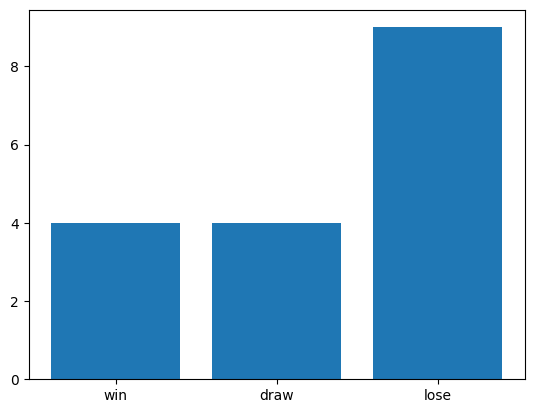

In [1]:
import random # 컴퓨터 input 값을 랜덤으로 설정하기 위해 사용
import numpy as np # 그래프 그리기 위해서 numpy 사용
import matplotlib.pyplot as plt # 그래프 그리기

rcp_dict = {1: '가위', 2: '바위', 3:'보'} # 가위바위보 딕셔너리

# 초기값 생성
total_count = 0
win_count = 0
lose_count = 0
draw_count = 0

# 파일 불러오기: 있으면 기존 데이터 불러오고 없으면 except 탈출.
try: 
    with open('rcp_game.txt','r') as f:
        total, win, draw, lose, rate = f.readlines()
        total_count = int(total.rstrip())
        win_count = int(win.rstrip())
        draw_count = int(draw.rstrip())
        lose_count = int(lose.rstrip())
        win_rate = float(rate.rstrip())
except:
    pass


# 반복문
while True:
    user_input = input("가위(1), 바위(2), 보(3), '종료', '승률', '그래프'를 입력해주세요.: ")

    if user_input == '종료':
        print("현재까지 승률 : {:.1f}".format(win_rate) + '\n' +"게임을 종료합니다.")
        break
    # rcp_dict의 key값을 사용하기 위해 + computer input값을 랜덤으로 생성하기 위해 randint함수 사용
    com_input = random.randint(1,3)

    # 게임수 카운트
    total_count += 1
    
    # 가위바위보 시작
    if user_input in ['1','2','3']: # 숫자 1,2,3 중 하나 입력
        # 이길 경우: 바위(2)-가위(1), 보(3)-바위(2) -> 1, 가위(1)-보(3) -> -2 
        if int(user_input) - int(com_input) == 1 or int(user_input) - int(com_input) == -2: 
            # 1승 추가
            win_count += 1
            # 결과 출력
            print('Player: '+ rcp_dict[int(user_input)]+', '+ 'Computer: '+ rcp_dict[int(com_input)]+', ' + "플레이어 승리")
        
        # 비길 경우는 숫자가 같을 경우
        elif int(user_input) - int(com_input) == 0:
            # 무승부 1번 추가
            draw_count += 1
            print('Player: '+ rcp_dict[int(user_input)]+', '+ 'Computer: '+ rcp_dict[int(com_input)]+', ' + "무승부")
        # 나머지는 질 경우
        else:
            lose_count += 1
            print('Player: '+ rcp_dict[int(user_input)]+', '+ 'Computer: '+ rcp_dict[int(com_input)]+', ' + "플레이어 패배")

    # 승률 구하기
    win_rate = win_count/total_count
    win_rate

    # 승률 출력
    if user_input == '승률':
        print("현재까지 승률: {:.1f}".format(win_rate), '%') # 소수점 첫째자리까지 출력
        print("게임을 종료합니다.")
        break
    
    # 그래프 출력
    if user_input == '그래프':
        # numpy 실행 
        x = np.arange(3) # x축 값 3개 생성
        shoubus =['win', 'draw', 'lose'] # x축 값의 이름 설정
        values = [win_count, draw_count, lose_count] # y축 값

        plt.bar(x, values) # x축, y축 값 입력
        plt.xticks(x, shoubus) # x축 값을 shoubus list로 변경

        plt.show() # 그래프 생성

        break 
    

# 파일 생성
with open('rcp_game.txt', 'w') as f:
    f.write(str(total_count)+'\n')
    f.write(str(win_count)+'\n')
    f.write(str(draw_count)+'\n')
    f.write(str(lose_count)+'\n')
    f.write(str(win_rate)+'\n')






